<a href="https://colab.research.google.com/github/ruchithareddy269/Adv-Dm-clustering-2/blob/main/Adv_DM_Clustering_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

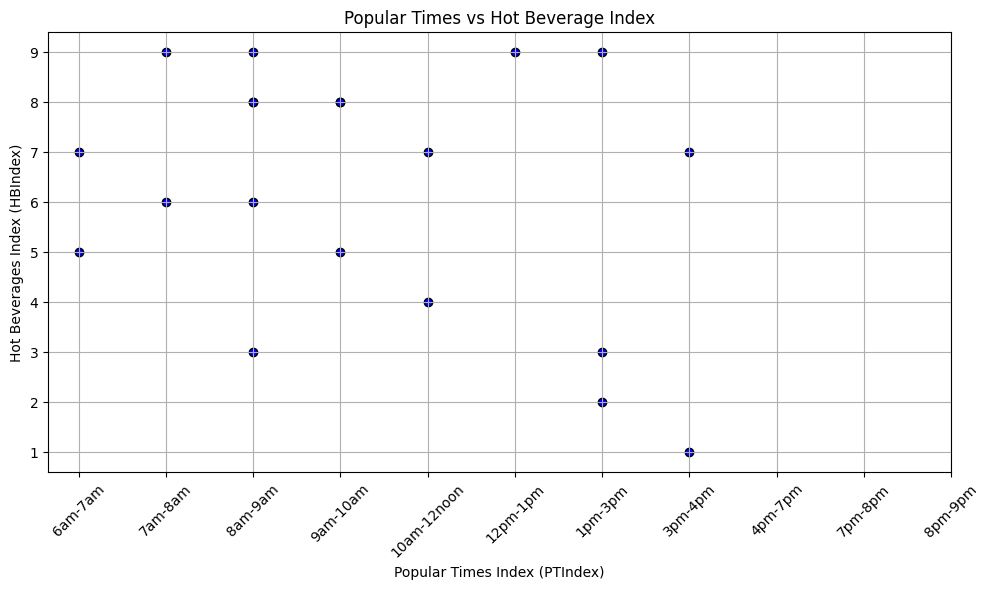

In [10]:
import matplotlib.pyplot as plt
# Given data
data = {
    'PTIndex': [1, 1, 2, 2, 3, 3, 3, 3, 4, 4, 3, 5, 7, 5, 4, 6, 7, 7, 8, 8],
    'HBIndex': [5, 7, 6, 9, 6, 8, 8, 9, 8, 8, 3, 4, 2, 7, 5, 9, 3, 9, 1, 7]
}
# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(data['PTIndex'], data['HBIndex'], c='blue', marker='o', edgecolors='black')
plt.title('Popular Times vs Hot Beverage Index')
plt.xlabel('Popular Times Index (PTIndex)')
plt.ylabel('Hot Beverages Index (HBIndex)')
plt.grid(True)
plt.xticks(list(range(1, 12)),
           ["6am-7am", "7am-8am", "8am-9am", "9am-10am", "10am-12noon", "12pm-1pm", "1pm-3pm", "3pm-4pm", "4pm-7pm", "7pm-8pm", "8pm-9pm"],
           rotation=45)
plt.tight_layout()
plt.show()

# **Data:**
## Variables:
PTIndex (Popular Times Index): This is a numerical representation of the hours in a day. It ranges from 1 (6am-7am) to 11 (8pm-9pm).
HBIndex (Hot Beverages Index): This is a numerical representation of the type of hot beverage. It ranges from 1 (Coffee type 1) to 9 (Coffee Of the Day).

## Approach:
**Data Visualization:** Before clustering, it's always good to have a visual representation of the data. We'll plot PTIndex against HBIndex to see if there are any visible clusters.

**Feature Scaling:** Clustering algorithms, especially like KMeans, are sensitive to the scale of data. However, since our indices (PTIndex and HBIndex) are on roughly similar scales, this may not be strictly necessary, but it's a good practice.

**Choosing a Clustering Algorithm:** For this data, we'll use the KMeans clustering algorithm. It's simple and effective for such problems. However, we need to decide on the number of clusters. We want a maximum of three, but we can use the Elbow method to ascertain the optimal number.

**Cluster Interpretation:** Once we've identified our clusters, we'll interpret each of them to decide on when and for which beverage the coupon should be offered.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

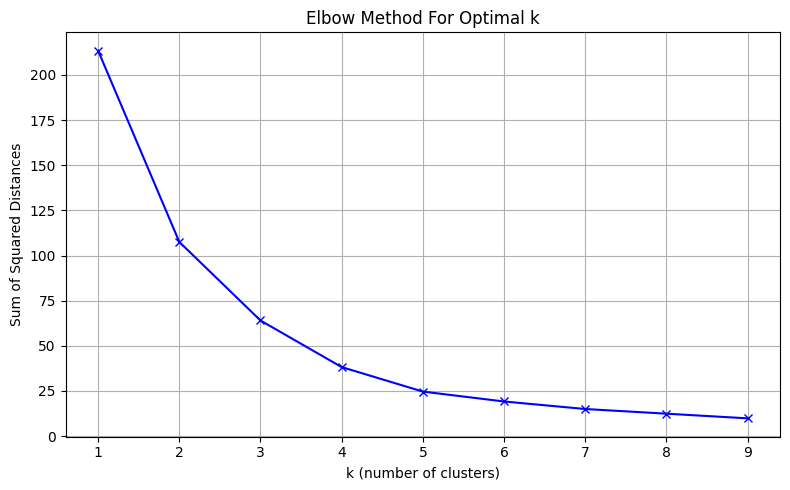

In [11]:
from sklearn.cluster import KMeans

# Extracting the data points for clustering
X = list(zip(data['PTIndex'], data['HBIndex']))

# Sum of squared distances for different values of k
ssd = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(X)
    ssd.append(kmeans.inertia_)

# Plotting the Elbow method
plt.figure(figsize=(8, 5))
plt.plot(K, ssd, 'bx-')
plt.xlabel('k (number of clusters)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


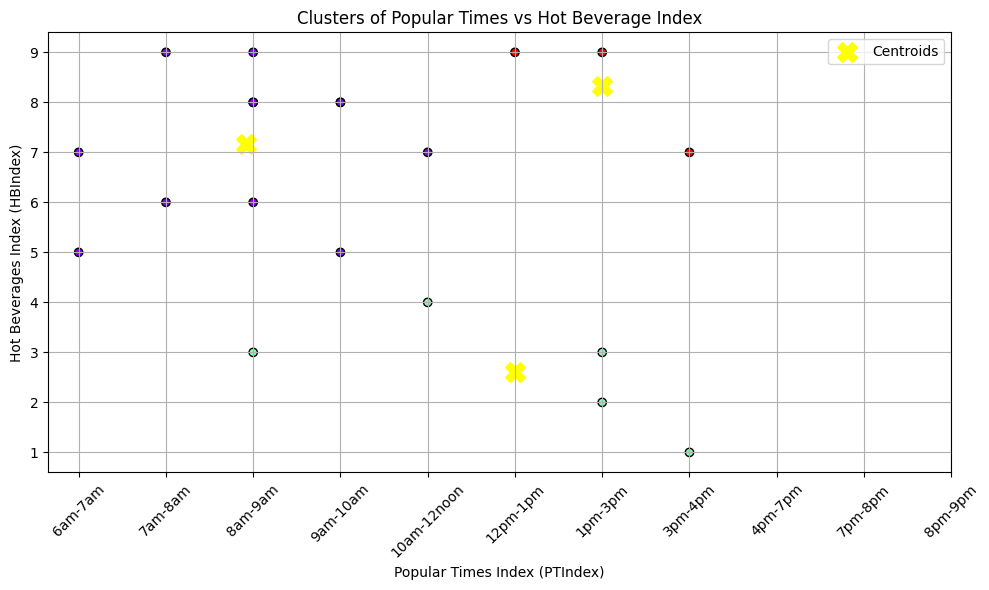

In [12]:
# Applying KMeans with 3 clusters
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X)

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['PTIndex'], data['HBIndex'], c=clusters, cmap='rainbow', marker='o', edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', marker='X', label='Centroids')
plt.title('Clusters of Popular Times vs Hot Beverage Index')
plt.xlabel('Popular Times Index (PTIndex)')
plt.ylabel('Hot Beverages Index (HBIndex)')
plt.grid(True)
plt.xticks(list(range(1, 12)),
           ["6am-7am", "7am-8am", "8am-9am", "9am-10am", "10am-12noon", "12pm-1pm", "1pm-3pm", "3pm-4pm", "4pm-7pm", "7pm-8pm", "8pm-9pm"],
           rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# **Recommendations:**
Based on these clusters, the manager can consider the following strategies:

1. **Morning Offers (Purple Cluster):** Given the popularity of Coffee Of the Day and Espresso Shot during 8 am - 10 am, offer discounts or promotions on these beverages during these hours to attract more customers.
2. **Diverse Beverage Promotion (Teal Cluster):** Since this cluster has varied beverage choices, consider introducing combo offers or sampling of new beverages throughout the day to attract and retain these customers.
3. **Evening Specials (Red Cluster):** Considering the preference for Hot Chocolate in the late afternoon and evening, create special evening offers or combos that include Hot Chocolate to boost sales during these hours.
The yellow 'X' markers in the plot represent the centroids of each cluster. These centroids can be used as representative points for each cluster, providing a summary of the typical behavior within that cluster.

# **Part B:  Developing Hierarchical Clustering Method on "Starbucks Hot Beverages Cluster"**

## **Single Link:**
### Method Explanation:
The shortest distance between two points in each cluster is what single linkage uses to determine the distance between two clusters. This frequently leads to "chain-like" clusters, wherein individual clusters are able to expand by joining forces with other clusters based on a small number of close locations.

### Starbucks Context:
From our results, the single linkage method created one dominant cluster with almost all the data points, while the other clusters contained very few points. This suggests that a majority of customers have similar purchasing behaviors, with only a few outliers.

### Implication:
This means that for the Starbucks manager, a broad, all-inclusive promotion or offer can be suitable for the majority of customers, while specialist offers tailored to a few specific demographics will target the target market. It's possible that this segmentation isn't the most revealing because single links tend to create clusters that resemble chains.

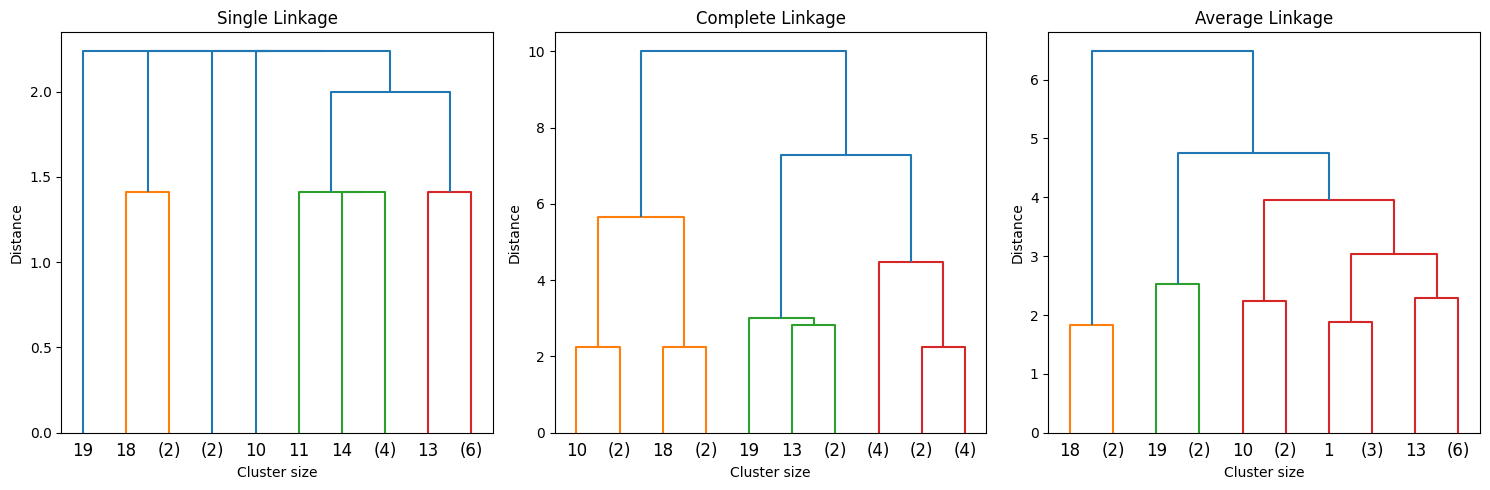

In [14]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
import numpy as np
import pandas as pd

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Plotting dendrogram for each linkage method
linkage_methods = ['single', 'complete', 'average']
plt.figure(figsize=(15, 5))

for i, method in enumerate(linkage_methods, 1):
    plt.subplot(1, 3, i)

    # Compute linkage matrix
    Z = linkage(df, method=method)

    # Plot dendrogram
    dendrogram(Z, truncate_mode='lastp', p=10)
    plt.title(f'{method.capitalize()} Linkage')
    plt.xlabel('Cluster size')
    plt.ylabel('Distance')
    plt.tight_layout()

plt.show()

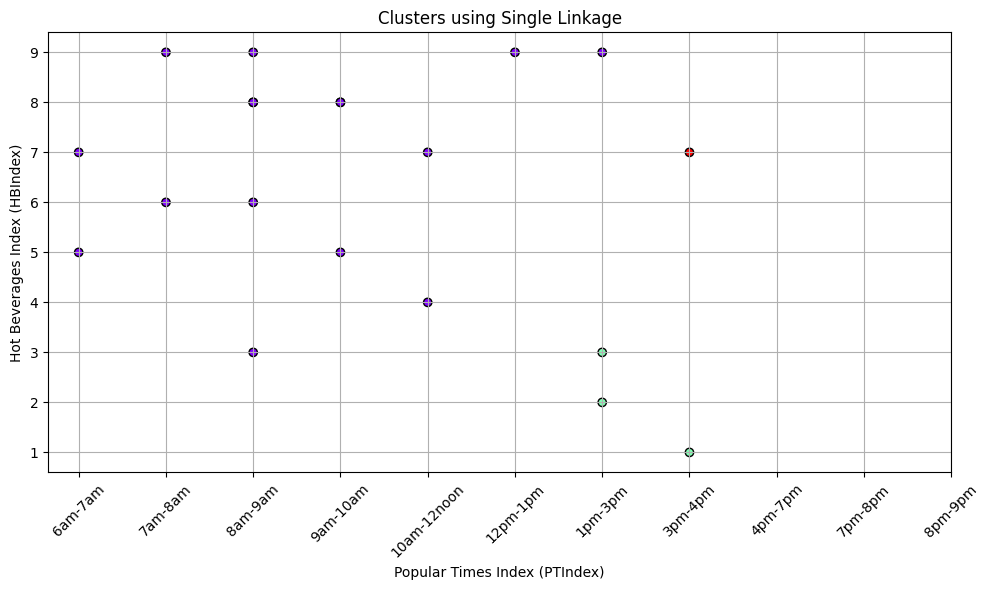

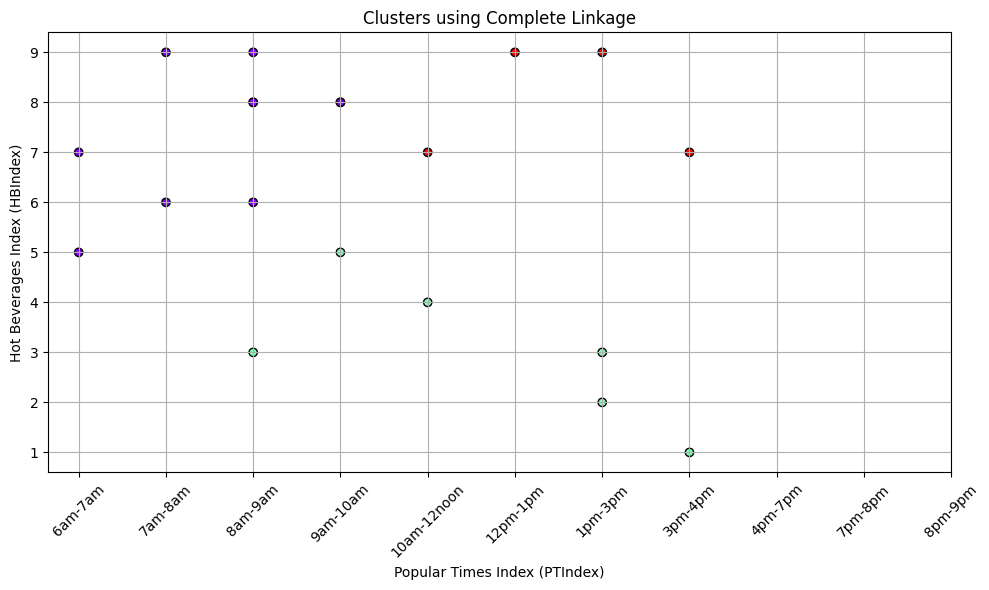

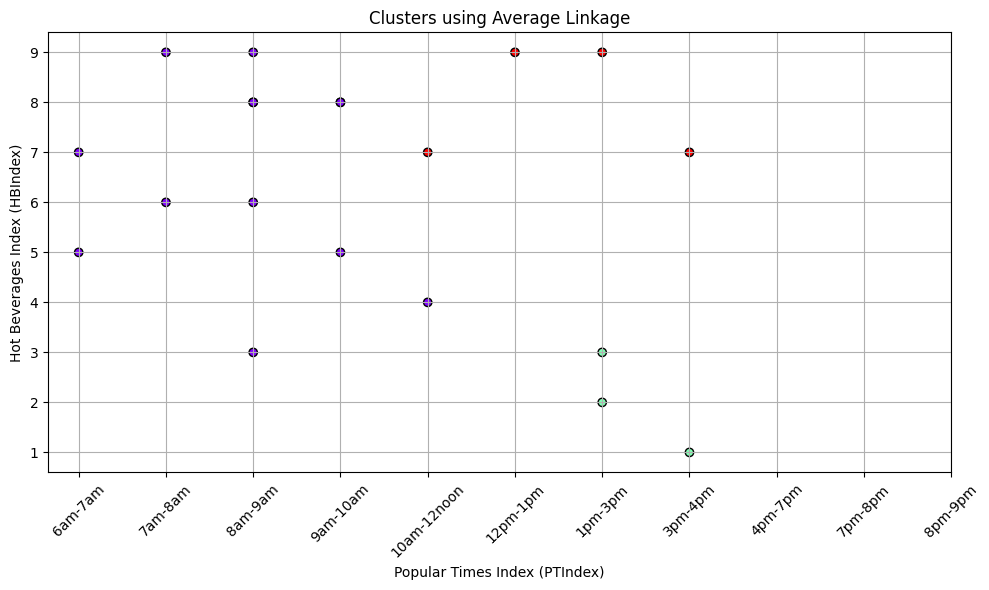

In [15]:
# Function to apply hierarchical clustering and plot the results
def hierarchical_clustering(method):
    # Compute linkage matrix
    Z = linkage(df, method=method)

    # Cut the tree to get 3 clusters
    df[f'Cluster_{method}'] = cut_tree(Z, n_clusters=3).flatten()

    # Plotting the clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(df['PTIndex'], df['HBIndex'], c=df[f'Cluster_{method}'], cmap='rainbow', marker='o', edgecolors='black')
    plt.title(f'Clusters using {method.capitalize()} Linkage')
    plt.xlabel('Popular Times Index (PTIndex)')
    plt.ylabel('Hot Beverages Index (HBIndex)')
    plt.grid(True)
    plt.xticks(list(range(1, 12)),
               ["6am-7am", "7am-8am", "8am-9am", "9am-10am", "10am-12noon", "12pm-1pm", "1pm-3pm", "3pm-4pm", "4pm-7pm", "7pm-8pm", "8pm-9pm"],
               rotation=45)
    plt.tight_layout()
    plt.show()

# Apply hierarchical clustering for each linkage method and plot
for method in linkage_methods:
    hierarchical_clustering(method)


# **Last Recommendations:**
### **1. Morning Coupons (Purple Cluster):** "Get 10% off on Coffee Of the Day or Espresso Shot between 8 am - 10 am!"
### **2. All-Day Special (Teal Cluster):** "Try our new beverage sampler with any purchase!"
### **3. Evening Delight (Red Cluster):** "Buy one Hot Chocolate, get the second at 50% off after 4 pm!"

###The manager can target particular customer habits and potentially boost traffic and customer loyalty by customizing promotions to these clusters.